In [1]:
#Principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importamos algunos algorítmos de clasificación
from sklearn import *
#from sklearn.neighboors import KNeightborsCassifier
#from sklearn.tree import DecisionTreeClassiffier
#from sklearn.esemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svn import SVC


In [3]:
from sklearn.metrics import accuracy_score

In [4]:
#Obtención de datos
df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.drop('PassengerId',axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()
len(df)
df.shape

(891, 11)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Aquí vemos cuántas columnas tienen valores que faltan
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
#Para ver el número de personas que sobrevivieron
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

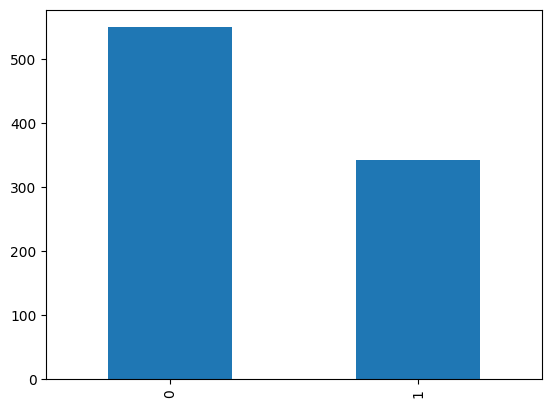

In [13]:
df.Survived.value_counts().plot(kind="bar")
plt.show()

In [14]:
#Formas de seleccionar la información de nuestro DataSet
df["Age"].head()
#Forma 2
df.Age.head()


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [15]:
#Forma 3 de seleccionar información concreta
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


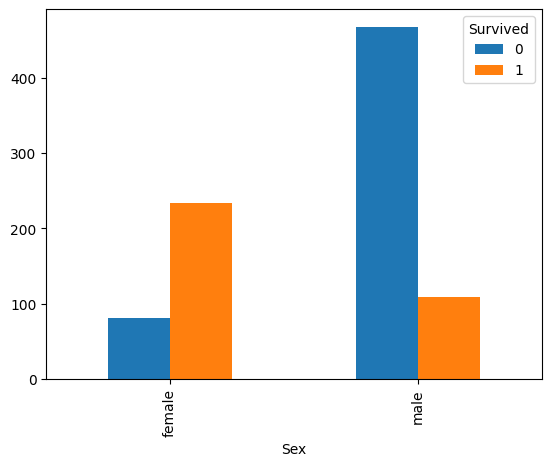

In [16]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar")
plt.show()

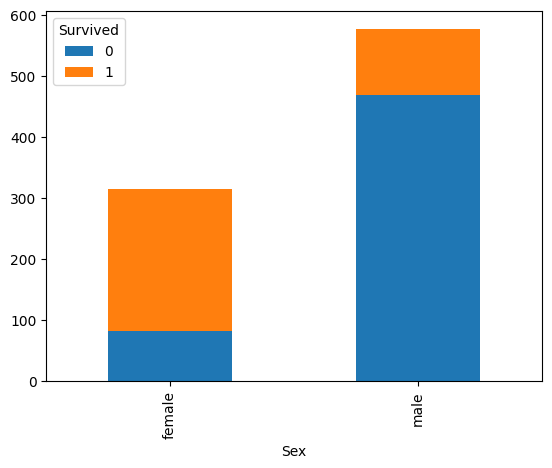

In [17]:
#Otras forma de visualizarlo
pd.crosstab(df.Sex, df.Survived).plot(kind="bar", stacked=True)
plt.show()

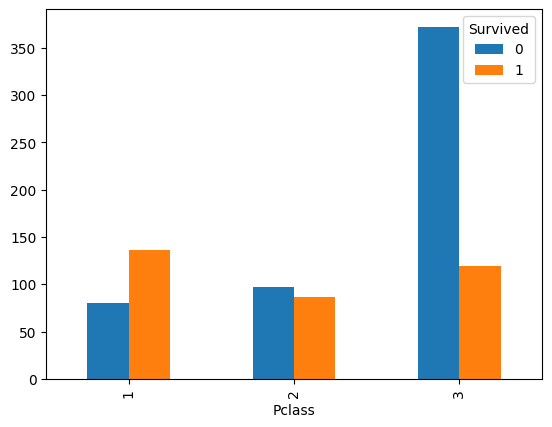

In [18]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar")
plt.show()

In [19]:
#Forma de seleccionar información concreta
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

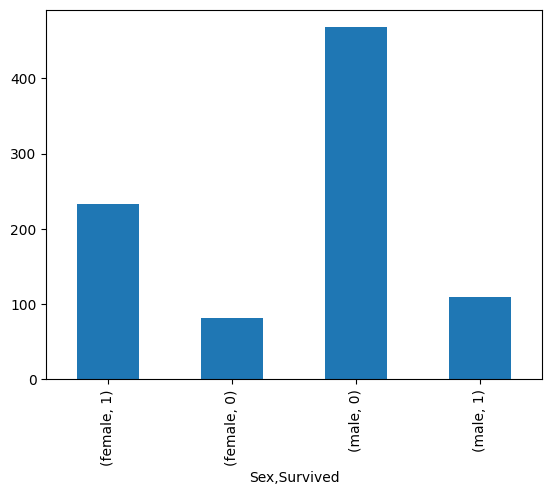

In [20]:
df.groupby("Sex").Survived.value_counts().plot(kind="bar")
plt.show()

In [21]:
#Forma de seleccionar información concreta
df_sex_uno = df[df.Pclass == 1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [22]:
#Ahoro selecciono de los de primera quienes sobrevivieron.
df_sex_uno_crosstab = df[df.Pclass == 1]["Survived"]
df_sex_uno_crosstab


1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [31]:
#Creando nuevos DFs
#Todos los que SÍ sobreviven
df_sobreviven_todos = df[df["Survived"]==1]
#Todos los que muerem
df_muertos_todos = df[df["Survived"]==0]
#Hombres supervivientes
hombres_supervivientes = df[df["Survived"] == 1 & (df['Sex'] == 'male')] 
#Mujeres supervivientes 
mujeres_supervivientes = df[df["Survived"] == 1 & (df['Sex'] == 'female')] 
#Hombres muertos
hombres_muertos = df[df["Survived"] == 0 & (df['Sex'] == 'male') ]
#Mujeres Muertas
mujeres_muertas = df[df["Survived"] == 0 &(df['Sex']== 'female')]

In [30]:
df_sobreviven_todos.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
df_muertos_todos.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [33]:
hombres_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [35]:
mujeres_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


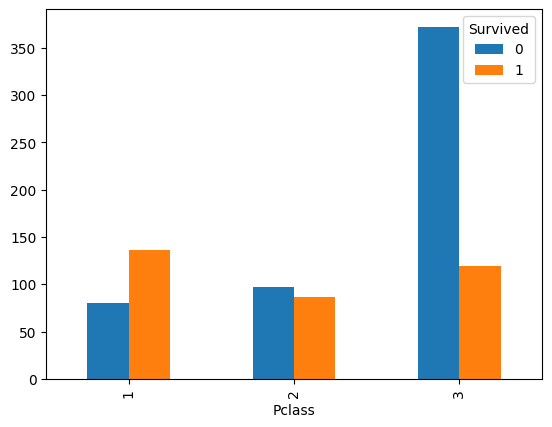

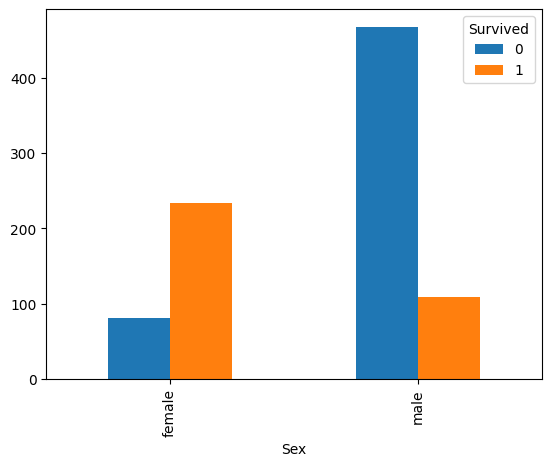

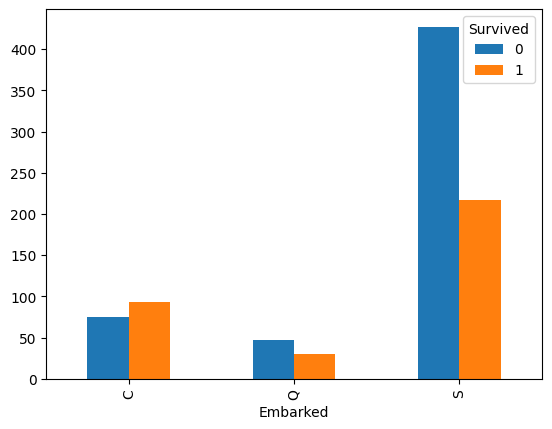

In [36]:
 ## Obtención de información de los gŕaficos
opciones = ["Pclass", "Sex", "Embarked"]
for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind="bar")
    plt.show()

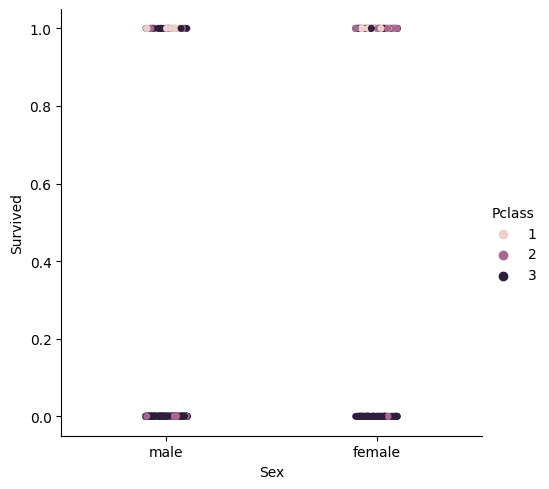

In [43]:
# Gráficos de Seaborn
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="strip", data=df)
plt.show()

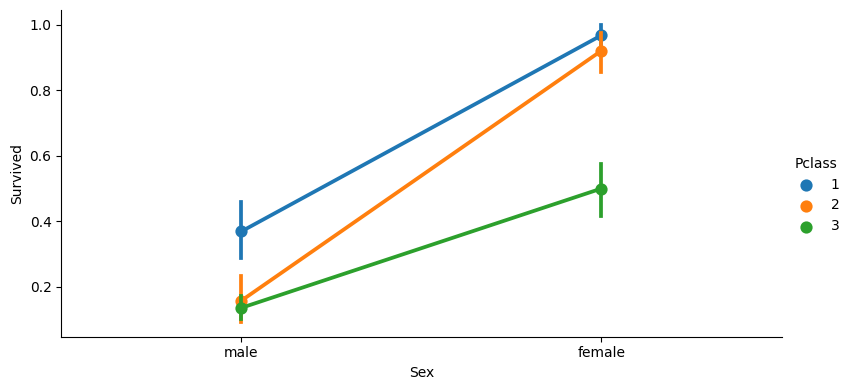

In [42]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="point", height=4, aspect=2, data=df)
plt.show()


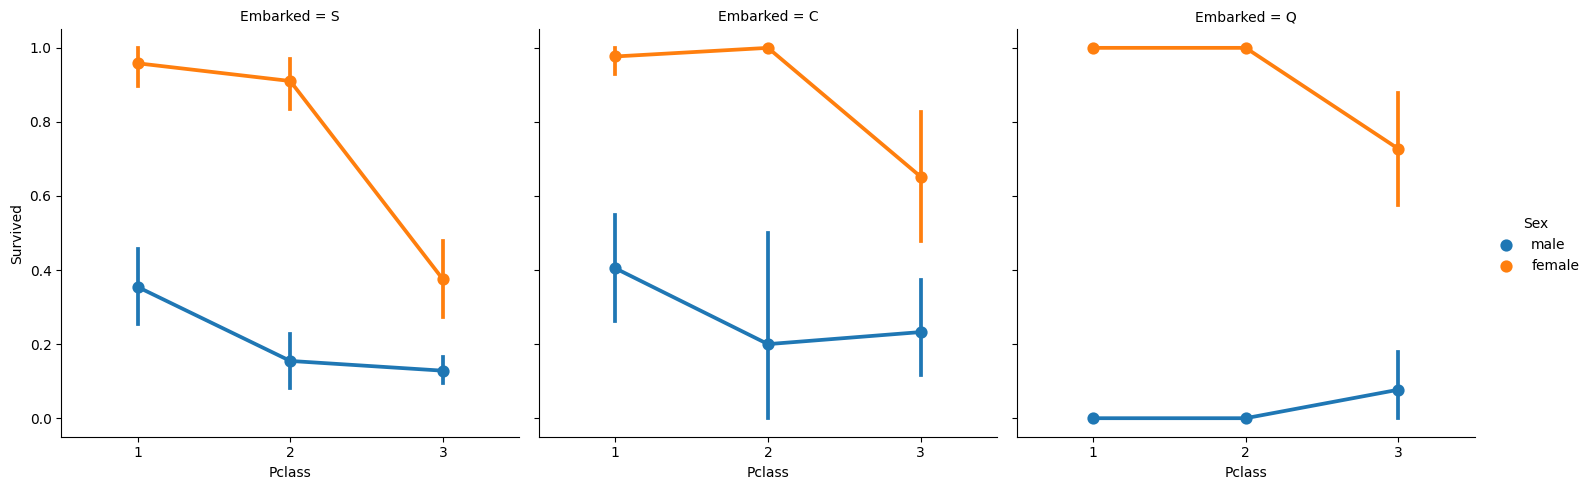

In [44]:
sns.catplot(x='Pclass', y='Survived', hue="Sex", col="Embarked", kind="point", data = df)
plt.show()

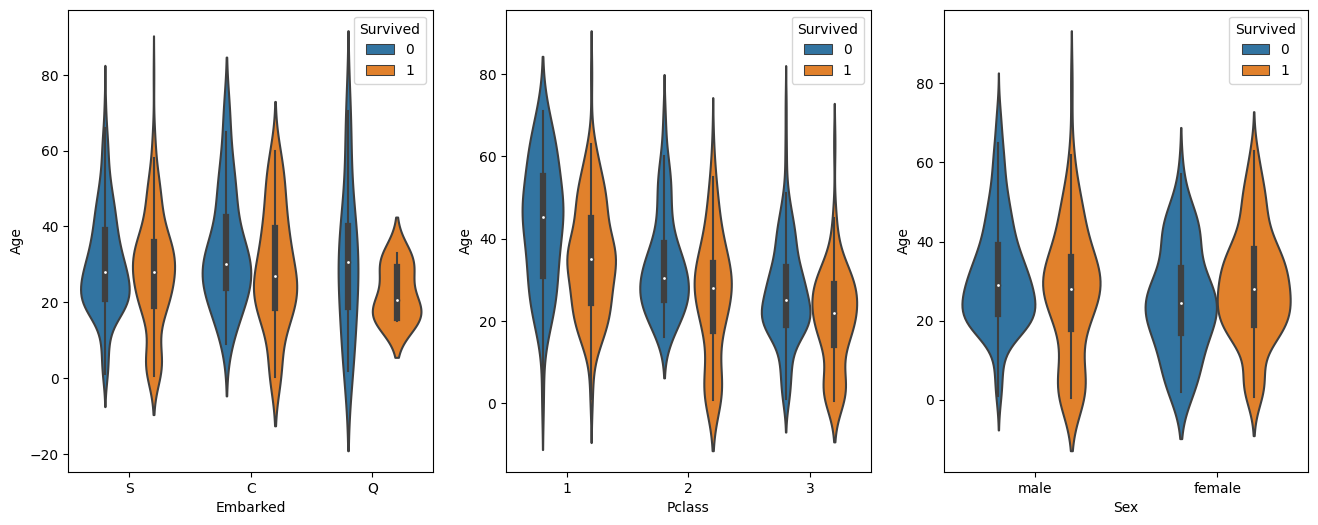

In [46]:
fig = plt.figure(figsize = (16,6))
#subplots
# 1 fila 3 columnas 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, ax=ax3)
plt.show()

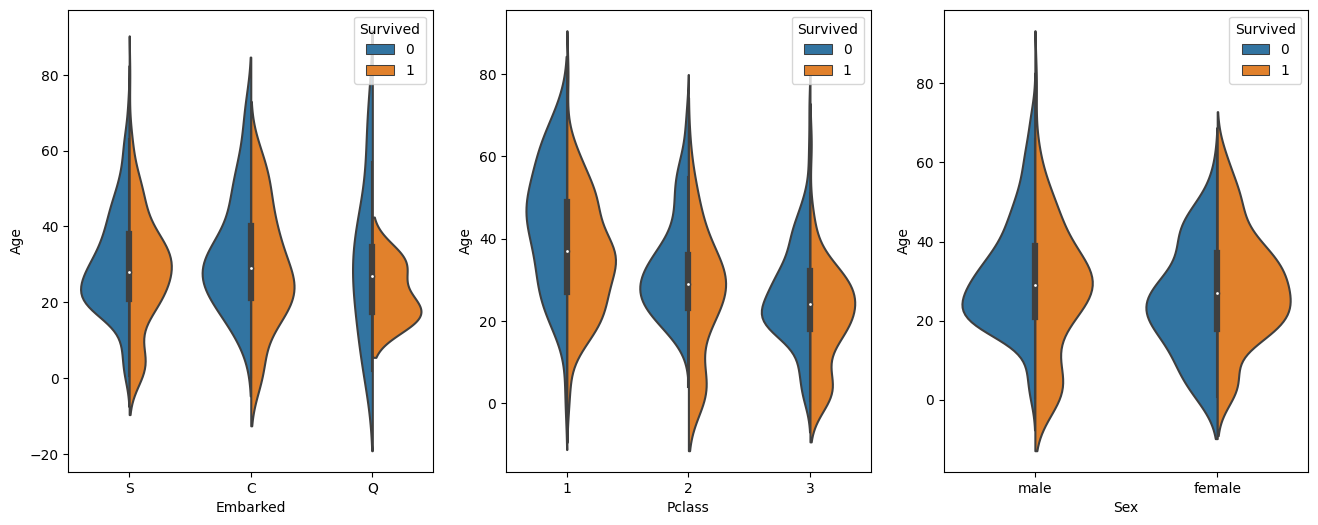

In [47]:
fig = plt.figure(figsize = (16,6))
#subplots
# 1 fila 3 columnas 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df,split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)
plt.show()

In [49]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/tmp/ipykernel_14611/644827889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


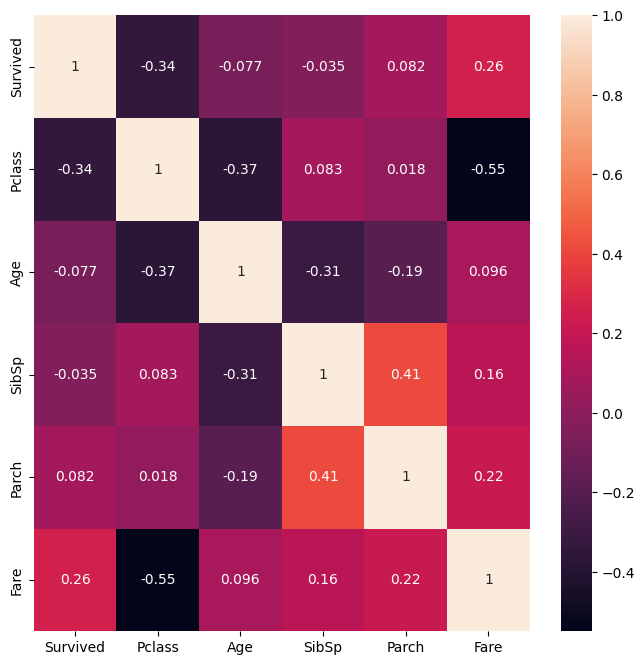

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

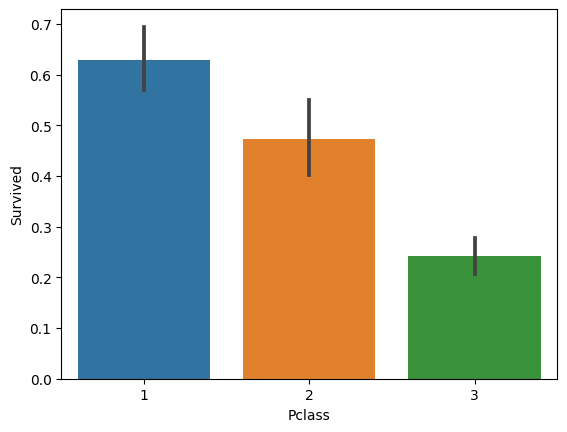

In [52]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

In [53]:
def function_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind="bar")
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,2)
    sns.barplot(x=feat, y="Survived", data=df)
    plt.show()

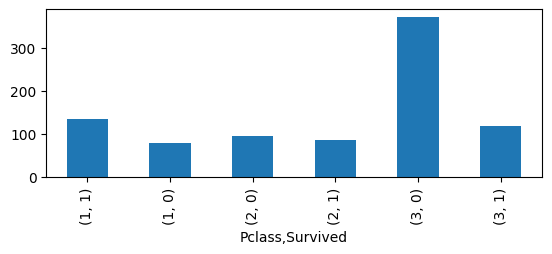

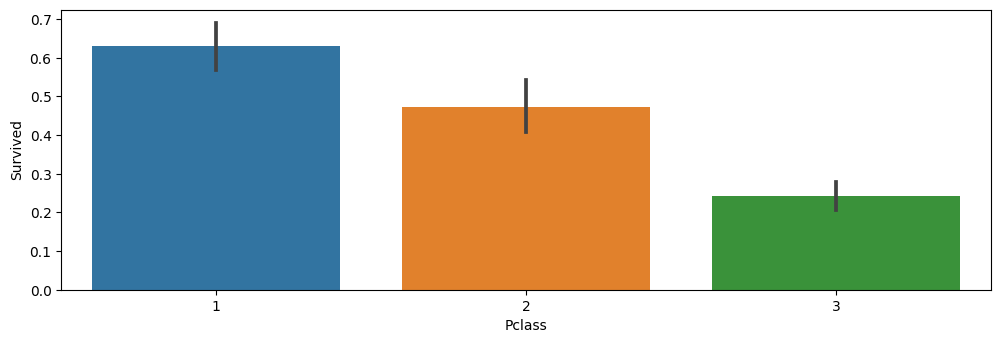

In [55]:
function_graficas("Pclass")

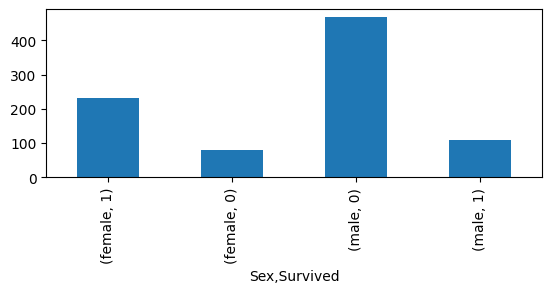

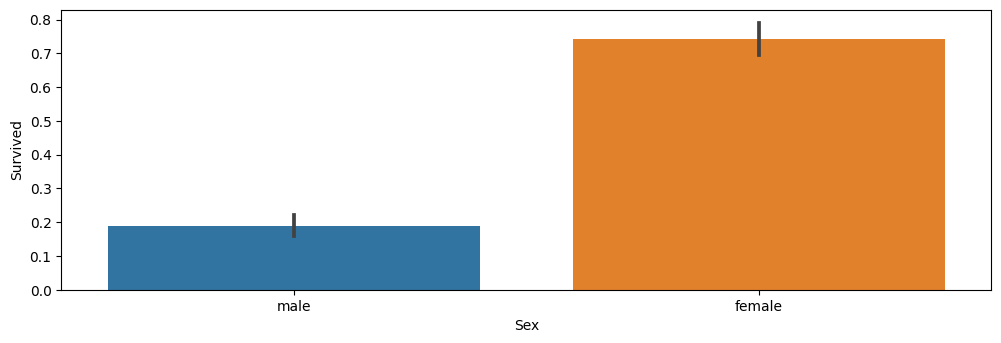

In [56]:
function_graficas("Sex")

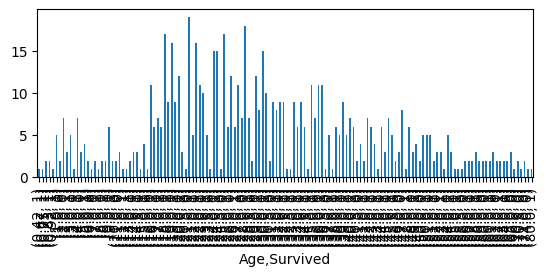

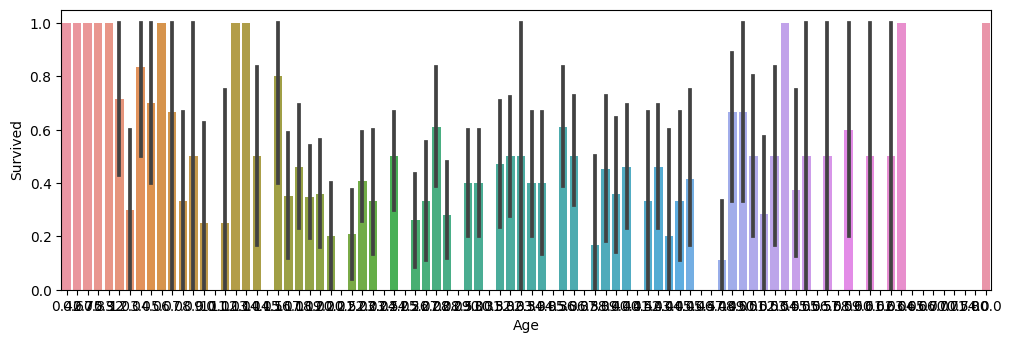

In [57]:
function_graficas("Age")

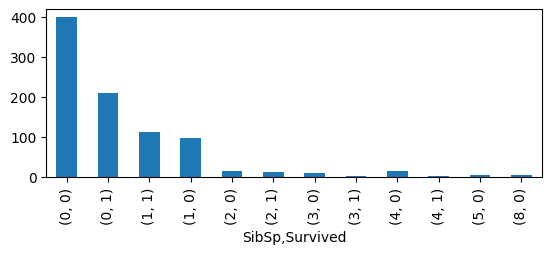

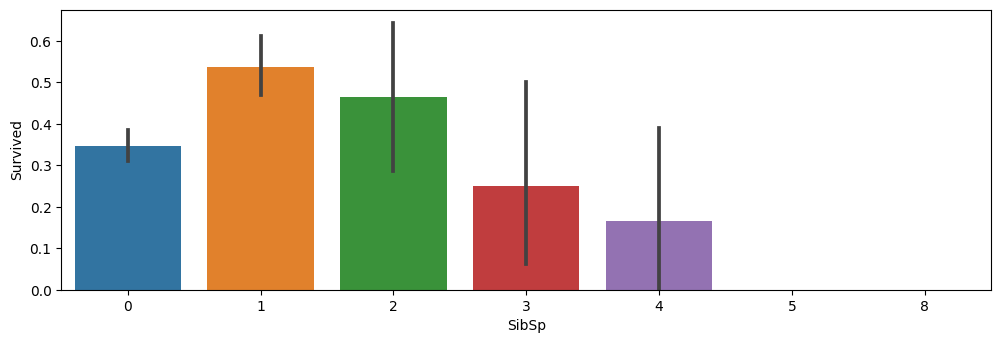

In [58]:
function_graficas("SibSp")

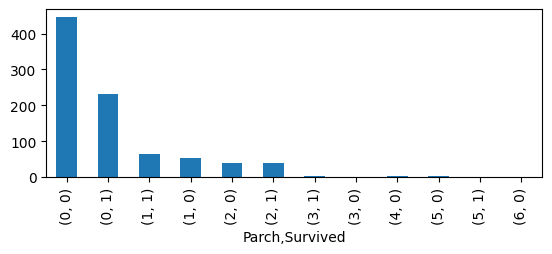

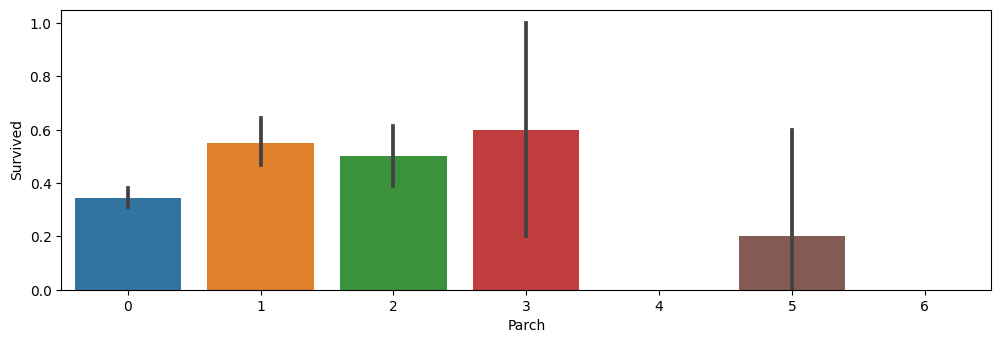

In [59]:
function_graficas("Parch")

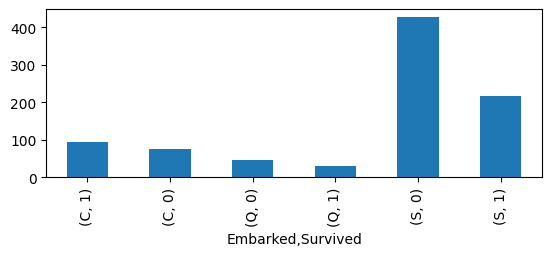

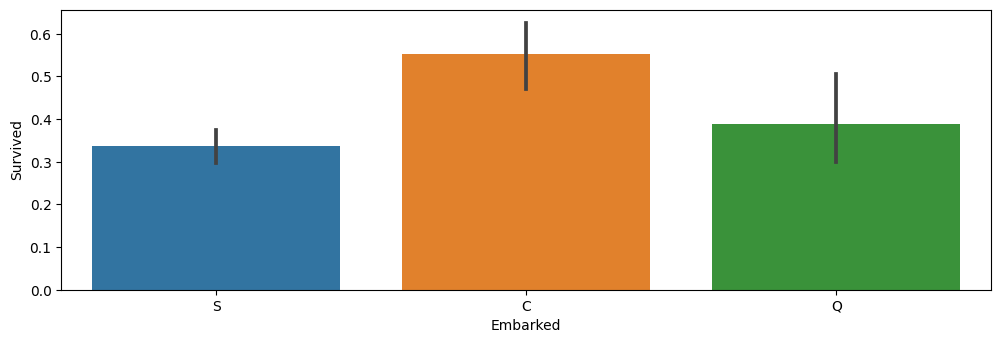

In [60]:
function_graficas("Embarked")